# K-Means Clustering

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

#### Import the Data

In [10]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


 #### Split the data

In [11]:
x = df.iloc[:,[3,4]].values

#### Using elbow method to find optimal number of clusters

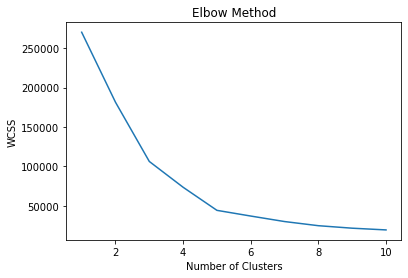

In [12]:
from sklearn.cluster import KMeans

#Within-Cluster Sum of Square
wcss = []

for i in range(1,11):           # 10 clusters
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Training K-Means model on Dataset

In [14]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [15]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

#### Visualizing clusters

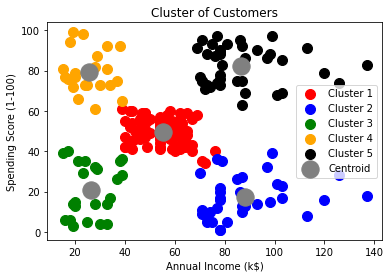

In [22]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=100,c='red',label='Cluster 1')     # after , is index 
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=100,c='green',label='Cluster 3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1],s=100,c='orange',label='Cluster 4')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1],s=100,c='black',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='grey',label='Centroid')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()